<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/revert-code-to-python/blob/master/2020_6_2_chap7_QQplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install yfinance

In [0]:
pip install requests

In [0]:
pip install bs4

In [0]:
!pip install -U -q PyDrive

In [0]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt#get current date
import pandas as pd
from scipy import stats
import requests
from bs4 import BeautifulSoup
from google.colab import files

In [0]:
def html_beautifulsoup(url):
    response = requests.get(url)
    html = response.content

    #beautifulsoup html will not look like soure
    #review beautifulsoup html to use find and findall
    soup = BeautifulSoup(html,"lxml")
    return soup

#soup_html: soup html is not same as source html
def yahoo_description(soup_html):
    element = soup_html.find('h1',class_='D(ib) Fz(16px) Lh(18px)')
    return element.text  

In [0]:
def stock_return(Stock_Name, Start_T, End_T, T_Interval):
  Stock_price = yf.download(Stock_Name,start=Start_T,End=End_T,interval = T_Interval)['Adj Close'].dropna()
  Ret = Stock_price.pct_change()[1:].dropna()
  info = Stock_Name
  Ret = Ret.sort_values()
  stdRet = (Ret-np.mean(Ret))/np.std(Ret)
  ##get z-score
  zscore = stats.zscore(list(range(1,len(Ret)+1)))
  cdf = stats.norm.cdf(zscore)
  a=stdRet.to_list()
  stderr = sum(pow(a-zscore,2))
  return stdRet,info, zscore,Ret,cdf,stderr

Please enter ticker(Default = JNJ)-->ibm
Enter start date(Default = 5 Years ago, 2015-05-18)-->
Enter end date(Default = Yesterday, 2020-06-11)-->
Enter date interval(1d,1wk,1mo Default = 1mo)-->
[*********************100%***********************]  1 of 1 completed



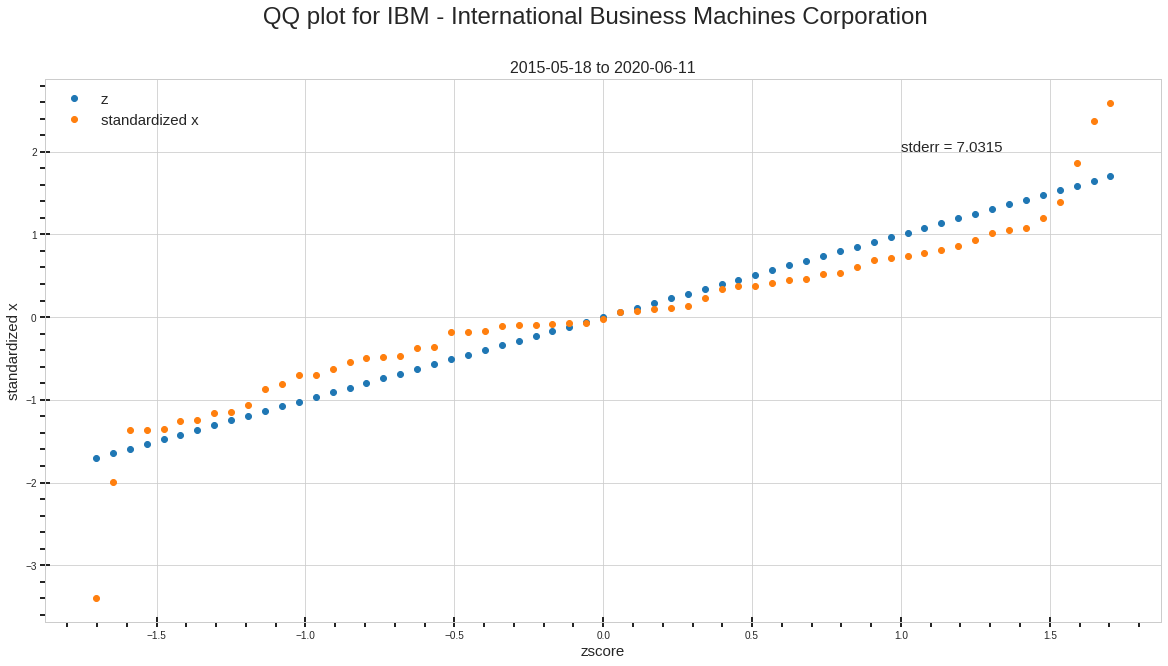

In [0]:
previousday = dt.date.today()-dt.timedelta(days=1)# get the date of previous day
Default_end = previousday.strftime("%Y-%m-%d") # change the format of the default datetime 
years_ago = dt.date.today()-dt.timedelta(days=1852)
Default_start = years_ago.strftime("%Y-%m-%d")

# request user input
Ticker = input('Please enter ticker(Default = JNJ)-->') or 'JNJ'
Start = input('Enter start date(' + 'Default = 5 Years ago, ' + Default_start + ')-->') or Default_start
End = input('Enter end date(Default = Yesterday, ' + Default_end + ')-->') or Default_end
T_interval = input('Enter date interval(1d,1wk,1mo Default = 1mo)-->') or '1mo'

soup_html = html_beautifulsoup("https://finance.yahoo.com/quote/"  + Ticker)

stdRet,info,zscore,Ret,cdf,stderr = stock_return(Ticker,Start,End,T_interval)

plt.figure(figsize=(20,10))
plt.style.use('seaborn-whitegrid')#set the background to be grid
plt.minorticks_on()
plt.tick_params(which='minor', length=5, width=2, direction='out')
plt.tick_params(which='major', length=10, width=2, direction='inout')
plt.plot(zscore,zscore,'o')
plt.plot(zscore,stdRet,'o')
plt.text(1,2,'stderr = {:.4f}'.format(stderr),fontsize = 15)
plt.legend(['z','standardized x'],prop={'size': 15})
plt.suptitle('   QQ plot for '+yahoo_description(soup_html),fontsize = 24)
plt.xlabel('zscore',fontsize = 15)
plt.ylabel('standardized x',fontsize = 15)

plt.title(Start+' to '+End,fontsize = 16)
stdRet = pd.DataFrame(stdRet.T)

print("")



In [0]:
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.4f}'.format
zscore = stats.zscore(list(range(1,len(Ret)+1)))
zscore = pd.DataFrame(zscore)
zscore = zscore.set_index(Ret.index)
cdf = pd.DataFrame(cdf)
cdf = cdf.set_index(Ret.index)
chart = pd.concat([Ret,stdRet,cdf,zscore],axis=1)
chart.columns = ['return','standardized x','cdf','z']
print(chart)


            return  standardized x    cdf       z
Date                                             
2018-10-01 -0.2366         -3.3906 0.0442 -1.7039
2020-03-01 -0.1388         -1.9960 0.0498 -1.6471
2019-05-01 -0.0947         -1.3674 0.0559 -1.5903
2020-02-01 -0.0945         -1.3647 0.0626 -1.5335
2016-01-01 -0.0932         -1.3468 0.0699 -1.4767
2015-08-01 -0.0870         -1.2587 0.0778 -1.4199
2019-08-01 -0.0857         -1.2401 0.0864 -1.3631
2019-10-01 -0.0804         -1.1638 0.0957 -1.3063
2017-04-01 -0.0795         -1.1517 0.1057 -1.2495
2018-12-01 -0.0736         -1.0678 0.1165 -1.1927
2017-07-01 -0.0595         -0.8668 0.1280 -1.1359
2018-04-01 -0.0552         -0.8049 0.1403 -1.0791
2018-02-01 -0.0481         -0.7033 0.1533 -1.0223
2017-05-01 -0.0478         -0.6992 0.1671 -0.9655
2020-06-01 -0.0425         -0.6237 0.1817 -0.9087
2016-04-01 -0.0364         -0.5366 0.1971 -0.8519
2015-10-01 -0.0337         -0.4989 0.2133 -0.7951
2016-10-01 -0.0325         -0.4811 0.2302 -0.7384


In [0]:
#get dataset for for chart
chart.to_csv('QQplot.csv') 
files.download('QQplot.csv')
print ("On the pc the file was downloaded to your 'Downloads' folder.")

On the pc the file was downloaded to your 'Downloads' folder.
